<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/diabetes.csv')
df.shape

(768, 9)

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [7]:
X = df[col_names]
y = df['Outcome']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [10]:
clf=DecisionTreeClassifier( max_depth=2)
clf=clf.fit(x_train,y_train)

In [11]:
y_pred=clf.predict(x_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7272727272727273
Recall: 0.2972972972972973
Precision: 0.6666666666666666


In [13]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

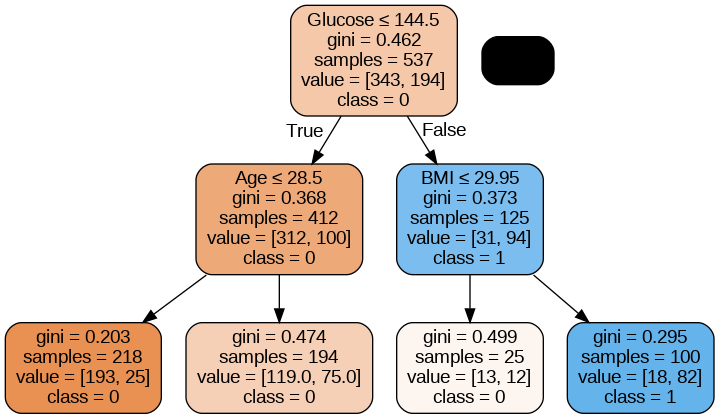

In [58]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True, special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))

Accuracy: 0.7792207792207793
Recall: 0.5540540540540541
Precision: 0.6949152542372882


In [18]:
rf=RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=4,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))

Accuracy: 0.7748917748917749
Recall: 0.5
Precision: 0.7115384615384616


In [19]:
rf=RandomForestClassifier(n_estimators=200,max_depth=None,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))

Accuracy: 0.7748917748917749
Recall: 0.5675675675675675
Precision: 0.6774193548387096


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import mode

In [21]:
model1 = LogisticRegression(max_iter=1000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier(n_neighbors=5)

In [23]:
for model in [model1, model2, model3]:
  model.fit(x_train, y_train)
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)


In [24]:
preds = np.array([pred1, pred2, pred3])
max_vote_preds, _ = mode(preds, axis=0)
max_vote_preds = max_vote_preds.flatten()

In [25]:
prob1 = model1.predict_proba(x_test)
prob2 = model2.predict_proba(x_test)
prob3 = model3.predict_proba(x_test)

In [26]:
avg_probs = (prob1 + prob2 + prob3) / 3
avg_vote_preds = np.argmax(avg_probs, axis=1)

In [27]:
acc1 = model1.score(x_train, y_train)
acc2 = model2.score(x_train, y_train)
acc3 = model3.score(x_train, y_train)

In [28]:
weights = np.array([acc1, acc2, acc3])
weighted_probs = (prob1 * weights[0] + prob2 * weights[1] + prob3 * weights[2]) / np.sum(weights)
weighted_vote_preds = np.argmax(weighted_probs, axis=1)

In [29]:
print("\nBase Model Accuracies:")
print("Logistic Regression:", accuracy_score(y_test, pred1))
print("Decision Tree:", accuracy_score(y_test, pred2))
print("KNN:", accuracy_score(y_test, pred3))



Base Model Accuracies:
Logistic Regression: 0.7792207792207793
Decision Tree: 0.7445887445887446
KNN: 0.7489177489177489


In [30]:
print("\nEnsemble Accuracies:")
print("Max Voting:", accuracy_score(y_test, max_vote_preds))
print("Average Voting:", accuracy_score(y_test, avg_vote_preds))
print("Weighted Voting:", accuracy_score(y_test, weighted_vote_preds))


Ensemble Accuracies:
Max Voting: 0.7835497835497836
Average Voting: 0.7878787878787878
Weighted Voting: 0.7835497835497836


In [31]:
print("\nClassification Report (Weighted Voting):")
print(classification_report(y_test, weighted_vote_preds))


Classification Report (Weighted Voting):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.67      0.64      0.65        74

    accuracy                           0.78       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [33]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


In [34]:
log_clf = LogisticRegression(max_iter=1000)
tree_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [35]:
hard_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('knn', knn_clf)],
    voting='hard')


In [36]:
soft_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('knn', knn_clf)],
    voting='soft'
)

In [37]:
hard_voting_clf.fit(x_train, y_train)
soft_voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [38]:
y_pred_hard = hard_voting_clf.predict(x_test)
y_pred_soft = soft_voting_clf.predict(x_test)

print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))

print("\nClassification Report (Soft Voting):")
print(classification_report(y_test, y_pred_soft))

Hard Voting Accuracy: 0.7835497835497836
Soft Voting Accuracy: 0.7878787878787878

Classification Report (Soft Voting):
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       157
           1       0.68      0.64      0.66        74

    accuracy                           0.79       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.79      0.79       231



In [43]:
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(x_train, y_train)
y_pred1 = rf1.predict(x_test)
print("Experiment 1: Default Parameters")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print()

Experiment 1: Default Parameters
Accuracy: 0.7792207792207793



In [44]:
rf2 = RandomForestClassifier(n_estimators=200, random_state=42)
rf2.fit(x_train, y_train)
y_pred2 = rf2.predict(x_test)
print("Experiment 2: n_estimators = 200")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print()

Experiment 2: n_estimators = 200
Accuracy: 0.7748917748917749



In [45]:
rf3 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf3.fit(x_train, y_train)
y_pred3 = rf3.predict(x_test)
print("Experiment 3: max_depth = 3")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print()


Experiment 3: max_depth = 3
Accuracy: 0.7705627705627706



In [46]:
rf4 = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)
rf4.fit(x_train, y_train)
y_pred4 = rf4.predict(x_test)
print("Experiment 4: n_estimators = 300, max_depth = 5")
print("Accuracy:", accuracy_score(y_test, y_pred4))
print()

Experiment 4: n_estimators = 300, max_depth = 5
Accuracy: 0.7748917748917749



In [47]:
results = pd.DataFrame({
    'Experiment': ['Default', 'n_estimators=200', 'max_depth=3', 'n_estimators=300, max_depth=5'],
    'Accuracy': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4)
    ]
})

print("Comparison Summary:")
print(results)

Comparison Summary:
                      Experiment  Accuracy
0                        Default  0.779221
1               n_estimators=200  0.774892
2                    max_depth=3  0.770563
3  n_estimators=300, max_depth=5  0.774892


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf1 = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,        # Enables Out-of-Bag evaluation
    random_state=42,
    bootstrap=True          # Must be True to use OOB
)
rf1.fit(x_train, y_train)


RandomForestRegressor(oob_score=True, random_state=42)

In [53]:
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
y_pred1 = rf1.predict(x_test)

print("Experiment 1: n_estimators = 100")
print(f"OOB Score: {rf1.oob_score_:.4f}")
print(f"Test R² Score: {r2_score(y_test, y_pred1):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred1)):.4f}")
print()

Experiment 1: n_estimators = 100
OOB Score: 0.2214
Test R² Score: 0.3012
Test RMSE: 0.3901



In [55]:
rf2 = RandomForestRegressor(
    n_estimators=300,
    oob_score=True,
    random_state=42,
    bootstrap=True
)
rf2.fit(x_train, y_train)
y_pred2 = rf2.predict(x_test)

print("Experiment 2: n_estimators = 300")
print(f"OOB Score: {rf2.oob_score_:.4f}")
print(f"Test R² Score: {r2_score(y_test, y_pred2):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred2)):.4f}")
print()

Experiment 2: n_estimators = 300
OOB Score: 0.2356
Test R² Score: 0.3095
Test RMSE: 0.3877



In [56]:
rf3 = RandomForestRegressor(
    n_estimators=20,
    oob_score=True,
    random_state=42,
    bootstrap=True
)
rf3.fit(x_train, y_train)
y_pred3 = rf3.predict(x_test)

print("Experiment 3: n_estimators = 20")
print(f"OOB Score: {rf3.oob_score_:.4f}")
print(f"Test R² Score: {r2_score(y_test, y_pred3):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred3)):.4f}")
print()

Experiment 3: n_estimators = 20
OOB Score: 0.1628
Test R² Score: 0.2775
Test RMSE: 0.3966



In [57]:
results = pd.DataFrame({
    'n_estimators': [20, 100, 300],
    'OOB_Score': [rf3.oob_score_, rf1.oob_score_, rf2.oob_score_],
    'Test_R2': [
        r2_score(y_test, y_pred3),
        r2_score(y_test, y_pred1),
        r2_score(y_test, y_pred2)
    ]
})

print("Comparison Summary:")
print(results)

Comparison Summary:
   n_estimators  OOB_Score   Test_R2
0            20   0.162828  0.277504
1           100   0.221398  0.301206
2           300   0.235608  0.309483
